In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# SG Temps data

In [2]:
df = pd.read_csv("Datasets_toy_problems/sgtemps.csv", names=['temp'])

In [3]:
df.head()

,temp
0,26.336905
1,25.832143
2,26.165476
3,25.728571
4,25.964286


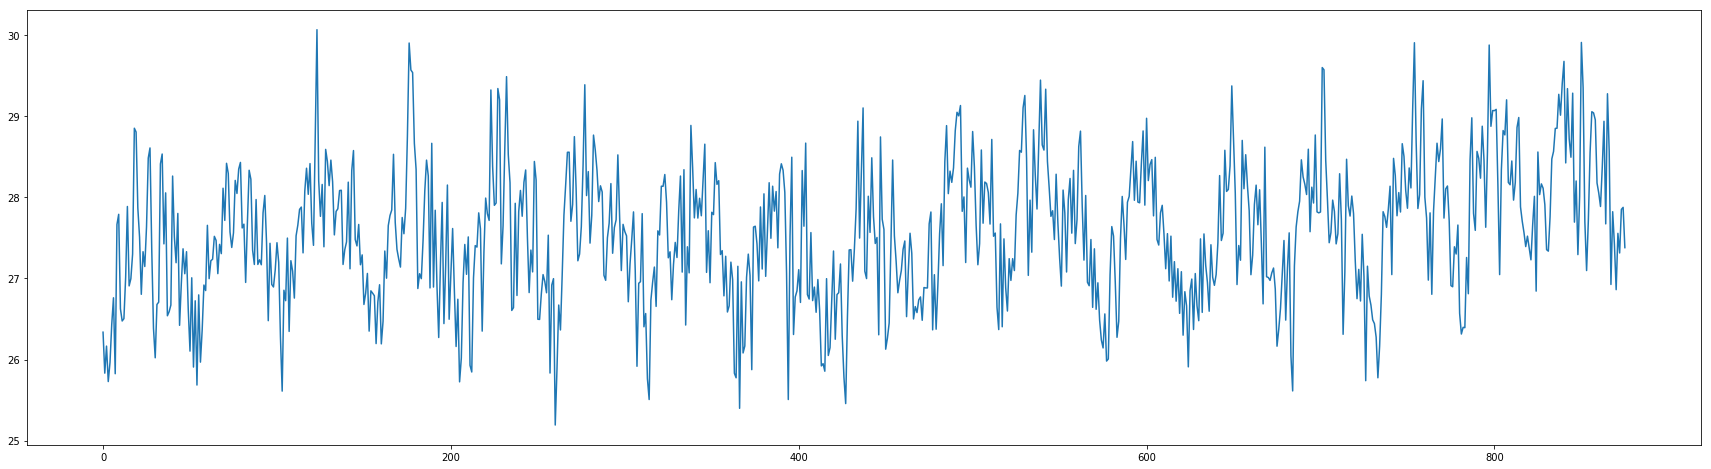

In [4]:
plt.figure(figsize=(30,8))
plt.plot(df.temp)

# Energy Demand Prediction (Assignment 1)

In [5]:
df = pd.read_csv("Datasets_toy_problems/Energy_Demand.csv", names=['Date', "Demand"])
df['Date']= pd.to_datetime(df['Date']) 

In [6]:
sorted_df = df.sort_values('Date')

In [7]:
sorted_df.head()

,Date,Demand
6574,1998-01-04 01:00:00,22259
6575,1998-01-04 02:00:00,21244
6576,1998-01-04 03:00:00,20651
6577,1998-01-04 04:00:00,20421
6578,1998-01-04 05:00:00,20713


In [8]:
df.head()

,Date,Demand
0,1998-12-31 01:00:00,29309
1,1998-12-31 02:00:00,28236
2,1998-12-31 03:00:00,27692
3,1998-12-31 04:00:00,27596
4,1998-12-31 05:00:00,27888


In [9]:
df.info() ## or df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32896 entries, 0 to 32895
Data columns (total 2 columns):
Date      32896 non-null datetime64[ns]
Demand    32896 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 514.1 KB


In [10]:
df.shape

(32896, 2)

In [11]:
df.Date.min()

Timestamp('1998-01-04 01:00:00')

In [12]:
df.describe(include='all')

,Date,Demand
count,32896,32896.000000
unique,32896,NaN
top,2000-04-21 10:00:00,NaN
freq,1,NaN
first,1998-01-04 01:00:00,NaN
last,2002-01-01 00:00:00,NaN
mean,NaN,29766.427408
std,NaN,5849.769954
min,NaN,17461.000000
25%,NaN,25473.000000


In [13]:
df.Date.sort_values()

6574    1998-01-04 01:00:00
6575    1998-01-04 02:00:00
6576    1998-01-04 03:00:00
6577    1998-01-04 04:00:00
6578    1998-01-04 05:00:00
6579    1998-01-04 06:00:00
6580    1998-01-04 07:00:00
6581    1998-01-04 08:00:00
6582    1998-01-04 09:00:00
6583    1998-01-04 10:00:00
6584    1998-01-04 11:00:00
6585    1998-01-04 12:00:00
6586    1998-01-04 13:00:00
6587    1998-01-04 14:00:00
6588    1998-01-04 15:00:00
6589    1998-01-04 16:00:00
6590    1998-01-04 17:00:00
6591    1998-01-04 18:00:00
6592    1998-01-04 19:00:00
6593    1998-01-04 20:00:00
6594    1998-01-04 21:00:00
6595    1998-01-04 22:00:00
6596    1998-01-04 23:00:00
5902    1998-01-05 00:00:00
5855    1998-01-05 01:00:00
5856    1998-01-05 02:00:00
5857    1998-01-05 03:00:00
5858    1998-01-05 04:00:00
5859    1998-01-05 05:00:00
5860    1998-01-05 06:00:00
                ...        
24180   2001-12-30 19:00:00
24181   2001-12-30 20:00:00
24182   2001-12-30 21:00:00
24183   2001-12-30 22:00:00
24184   2001-12-30 2

In [14]:
diff = pd.date_range(start = '1998-01-04 01:00:00', end = '2002-01-01 00:00:00', freq='1H').difference(df.Date)
len(diff) #num missing values

2096

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


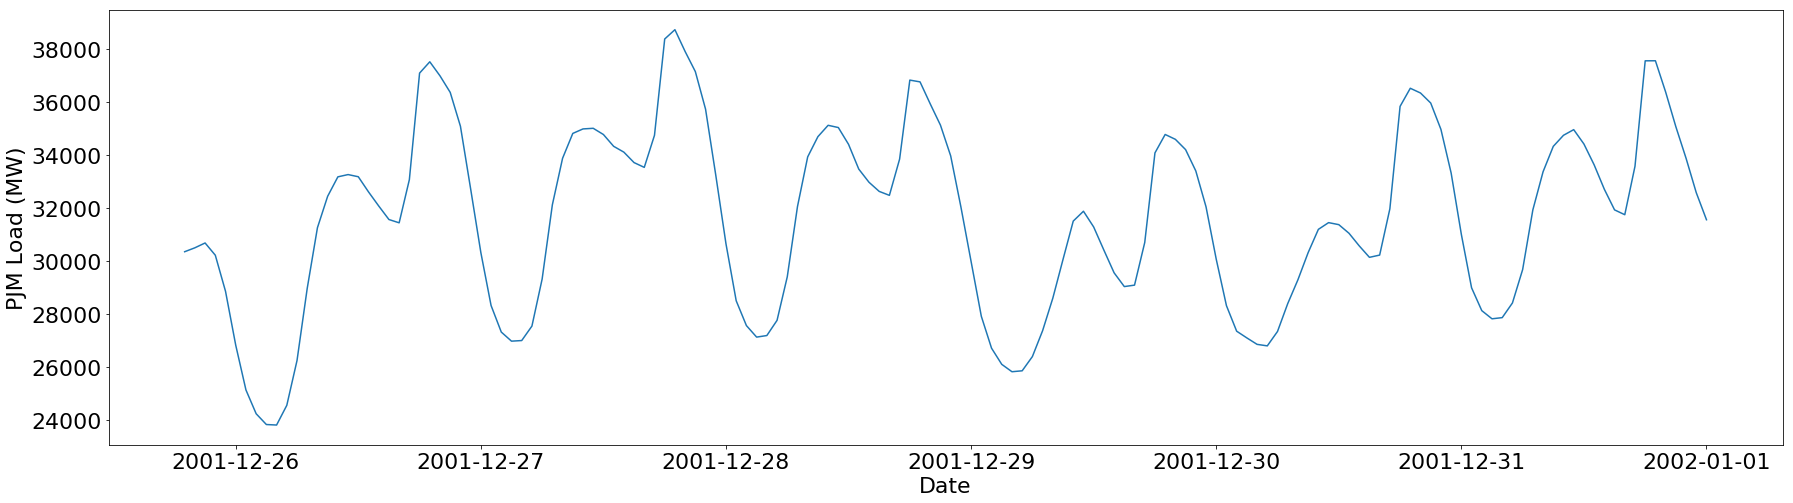

In [16]:
# df.head(30000).Demand.plot()
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30,8))
temp_sorted_df = sorted_df[-150:]
temp_sorted_df['Demand_diff'] = sorted_df.Demand #.diff().diff()
plt.plot(temp_sorted_df.Date, temp_sorted_df.Demand_diff)
plt.xlabel('Date')
plt.ylabel('PJM Load (MW)')

In [96]:
temp_sorted_df

,Date,Demand,Demand_diff
25130,2001-11-20 09:00:00,30967,-1787.0
25131,2001-11-20 10:00:00,31255,-248.0
25132,2001-11-20 11:00:00,31331,-212.0
25133,2001-11-20 12:00:00,31202,-205.0
25134,2001-11-20 13:00:00,30895,-178.0
25135,2001-11-20 14:00:00,30761,173.0
25136,2001-11-20 15:00:00,30480,-147.0
25137,2001-11-20 16:00:00,30609,410.0
25138,2001-11-20 17:00:00,31743,1005.0
25139,2001-11-20 18:00:00,34840,1963.0
